## Import Libraries

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

## Get the data

In [44]:
df = pd.read_csv('../../../datasets/parte2/test.csv')

#### Columns

In [45]:
df.columns

Index(['Data', 'Hora', 'Normal (kWh)', 'Horário Económico (kWh)',
       'Autoconsumo (kWh)', 'dt', 'dt_iso', 'city_name', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'sea_level', 'grnd_level',
       'humidity', 'wind_speed', 'rain_1h', 'clouds_all',
       'weather_description', 'shortwave_radiation (W/m²)',
       'direct_radiation (W/m²)', 'diffuse_radiation (W/m²)',
       'direct_normal_irradiance (W/m²)', 'terrestrial_radiation (W/m²)',
       'direct_radiation_instant (W/m²)', 'diffuse_radiation_instant (W/m²)',
       'direct_normal_irradiance_instant (W/m²)',
       'terrestrial_radiation_instant (W/m²)'],
      dtype='object')

#### Shape

In [46]:
if 'Injeção na rede (kWh)' in df:
    df['Injeção na rede (kWh)'].value_counts()

In [47]:
df.shape

(2256, 29)

In [48]:
df.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),dt,dt_iso,city_name,temp,feels_like,...,weather_description,shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²)
0,2023-01-01,0,0.0,0.467,0.0,1672531200,2023-01-01 00:00:00+00:00,local,12.93,12.76,...,moderate rain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-01-01,1,0.0,0.577,0.0,1672534800,2023-01-01 01:00:00+00:00,local,13.49,13.38,...,moderate rain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-01-01,2,0.0,0.346,0.0,1672538400,2023-01-01 02:00:00+00:00,local,13.55,13.44,...,moderate rain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-01-01,3,0.0,0.270,0.0,1672542000,2023-01-01 03:00:00+00:00,local,13.61,13.51,...,moderate rain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-01-01,4,0.0,0.252,0.0,1672545600,2023-01-01 04:00:00+00:00,local,13.59,13.49,...,moderate rain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Dataset info

In [49]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Data                                     2256 non-null   object 
 1   Hora                                     2256 non-null   int64  
 2   Normal (kWh)                             2256 non-null   float64
 3   Horário Económico (kWh)                  2256 non-null   float64
 4   Autoconsumo (kWh)                        2256 non-null   float64
 5   dt                                       2256 non-null   int64  
 6   dt_iso                                   2256 non-null   object 
 7   city_name                                2256 non-null   object 
 8   temp                                     2256 non-null   float64
 9   feels_like                               2256 non-null   float64
 10  temp_min                                 2256 no

#### Unique values

In [50]:
print(df["dt"].unique())
print(len(df["dt"].unique()))

print(df["city_name"].unique())
print(df["weather_description"].unique())

print(df["rain_1h"].unique())
print(len(df["rain_1h"].unique()))

[1672531200 1672534800 1672538400 ... 1680642000 1680645600 1680649200]
2256
['local']
['moderate rain' 'heavy intensity rain' 'light rain' 'overcast clouds'
 'scattered clouds' 'few clouds' 'sky is clear' 'broken clouds'
 'clear sky']
[3.72 3.26 2.44 1.74 1.13 1.23 1.2  2.2  2.13 2.04 3.1  4.96 6.11 6.38
 6.16 5.42 3.76 2.03 1.3  0.85 0.5  0.31 0.26 0.15 0.24 0.19 0.22 0.37
 0.47 0.14  nan 0.12 0.27 0.28 0.2  0.58 1.09 1.72 2.23 2.84 4.48 3.86
 3.02 3.35 3.36 3.11 1.26 0.67 0.29 0.32 0.3  0.64 0.98 1.51 1.71 1.33
 1.25 1.22 1.64 3.19 3.28 2.45 0.63 0.49 0.43 0.57 0.9  0.44 0.33 0.46
 0.34 0.16 0.11 0.23 0.71 2.55 4.07 3.79 1.   0.17 0.13 0.25 0.62 0.96
 0.36 0.74 1.08 0.97 0.83 0.84 0.7  1.17 0.81 0.66 1.49 1.06 0.99 0.86
 1.35 1.9  2.69 2.7  1.42 0.38 0.42 0.52 0.65 0.79 0.48 1.21 0.39 0.18
 0.89 0.56 1.53 1.6  1.61 2.06 1.52 0.35 0.68]
121


#### Statistical dispersion

In [51]:
print(df.describe())


              Hora  Normal (kWh)  Horário Económico (kWh)  Autoconsumo (kWh)  \
count  2256.000000   2256.000000              2256.000000        2256.000000   
mean     11.500000      0.268060                 0.226809           0.119439   
std       6.923721      0.464323                 0.375752           0.190601   
min       0.000000      0.000000                 0.000000           0.000000   
25%       5.750000      0.000000                 0.000000           0.000000   
50%      11.500000      0.000000                 0.000000           0.000000   
75%      17.250000      0.398750                 0.336000           0.237250   
max      23.000000      3.381000                 2.771000           1.161000   

                 dt         temp   feels_like     temp_min     temp_max  \
count  2.256000e+03  2256.000000  2256.000000  2256.000000  2256.000000   
mean   1.676590e+09    72.797336    71.804592    71.693258    73.608262   
std    2.345024e+06   116.064194   116.196376   116.66

#### Missing values

In [52]:
print(df.isna().sum())

Data                                          0
Hora                                          0
Normal (kWh)                                  0
Horário Económico (kWh)                       0
Autoconsumo (kWh)                             0
dt                                            0
dt_iso                                        0
city_name                                     0
temp                                          0
feels_like                                    0
temp_min                                      0
temp_max                                      0
pressure                                      0
sea_level                                  2256
grnd_level                                 2256
humidity                                      0
wind_speed                                    0
rain_1h                                    2050
clouds_all                                    0
weather_description                           0
shortwave_radiation (W/m²)              

#### Filling missing value with 'None' in 'injection' column

In [53]:
df['injection'] = df['injection'].fillna("None")

KeyError: 'injection'

In [ ]:
print(df["injection"].unique())

['None' 'Low' 'Medium' 'High' 'Very High']


In [ ]:
print(df.isna().sum())

dt                                             0
city_name                                      0
temp                                           0
feels_like                                     0
temp_min                                       0
temp_max                                       0
pressure                                       0
sea_level                                  11016
grnd_level                                 11016
humidity                                       0
wind_speed                                     0
rain_1h                                     8732
clouds_all                                     0
weather_description                            0
date                                           0
hour                                           0
normal                                         0
economic_schedule                              0
self-consumption                               0
injection                                      0
shortwave_radiation 

## Univariate Analysis

#### dt variable

In [ ]:
df['dt'].value_counts()

dt
1632873600    1
1659322800    1
1659294000    1
1659297600    1
1659301200    1
             ..
1646096400    1
1646100000    1
1646103600    1
1646107200    1
1672527600    1
Name: count, Length: 11016, dtype: int64

## Multivariate Analysis

#### Relation between all variables

In [ ]:
#sns.pairplot(df, hue='injection ')

#### Features mean by class

In [ ]:
#df.groupby(by=['injection']).mean(numeric_only=True)

#### Outliers

/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

<Axes: ylabel='self-consumption'>

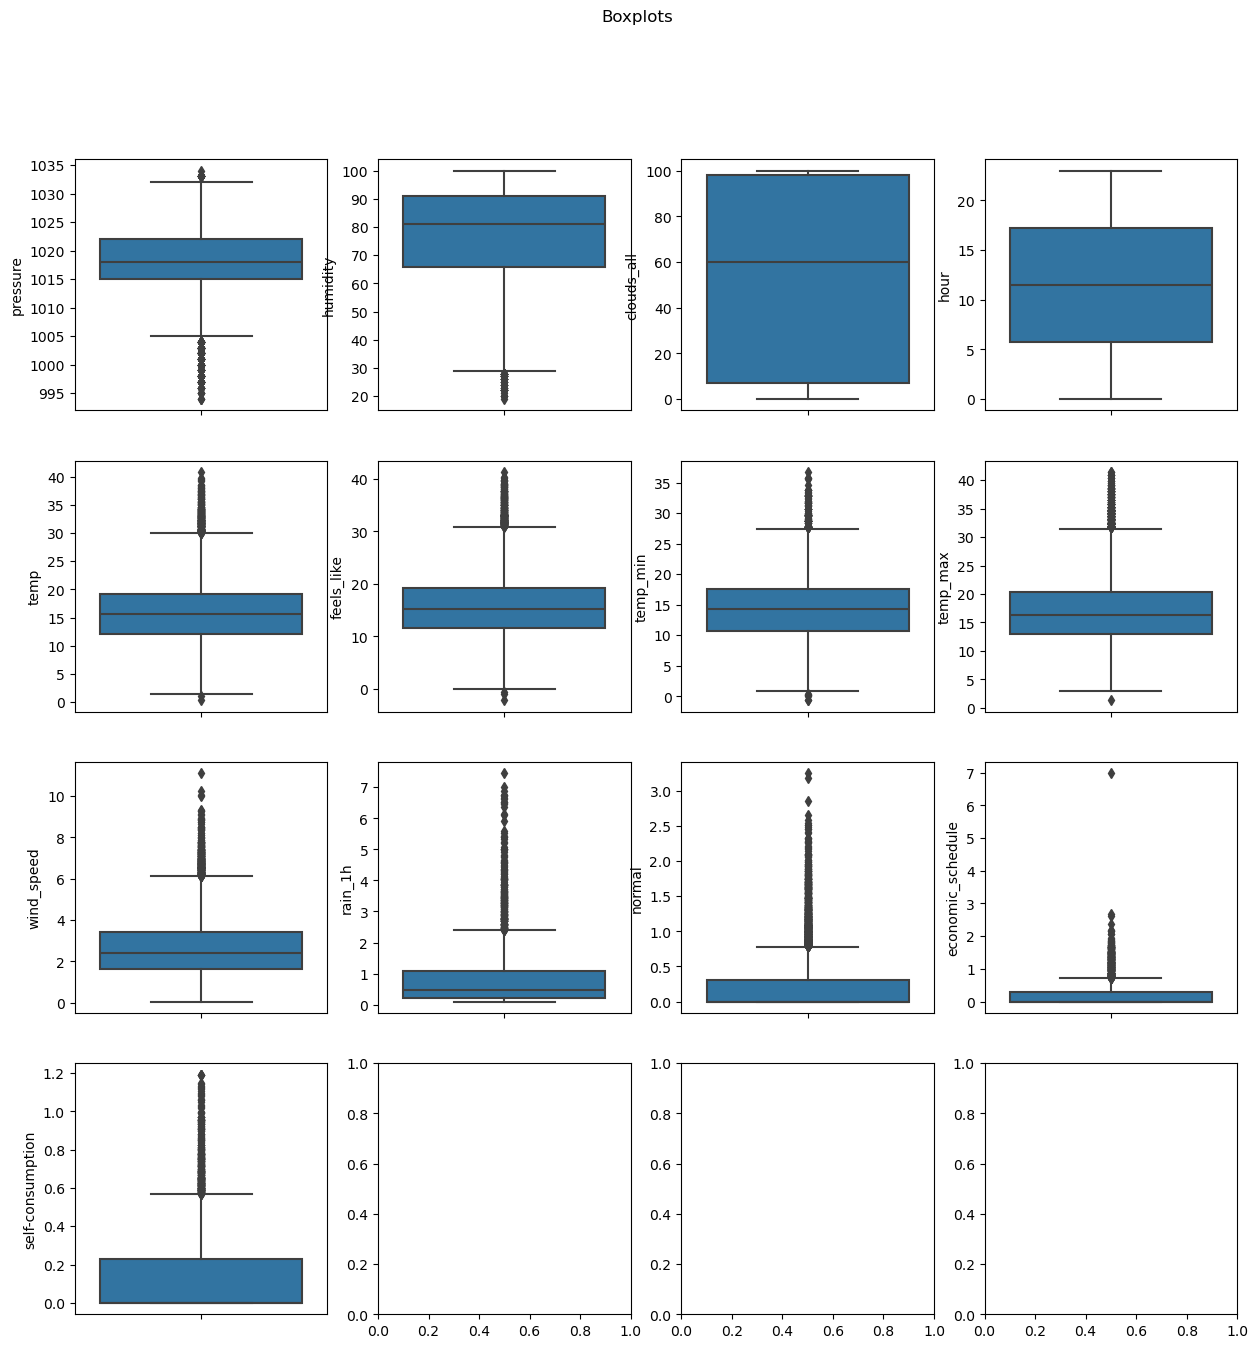

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(15, 15))
fig.suptitle("Boxplots")

sns.boxplot(y=df["pressure"], ax=axs[0,0])
sns.boxplot(y=df["humidity"], ax=axs[0,1])
sns.boxplot(y=df["clouds_all"], ax=axs[0,2])
sns.boxplot(y=df["hour"], ax=axs[0,3])
sns.boxplot(y=df["temp"], ax=axs[1,0])
sns.boxplot(y=df["feels_like"], ax=axs[1,1])
sns.boxplot(y=df["temp_min"], ax=axs[1,2])
sns.boxplot(y=df["temp_max"], ax=axs[1,3])
sns.boxplot(y=df["wind_speed"], ax=axs[2,0])
sns.boxplot(y=df["rain_1h"], ax=axs[2,1])
sns.boxplot(y=df["normal"], ax=axs[2,2])
sns.boxplot(y=df["economic_schedule"], ax=axs[2,3])
sns.boxplot(y=df["self-consumption"], ax=axs[3,0])

#### Statistical dispersion

/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

<Axes: xlabel='self-consumption', ylabel='Count'>

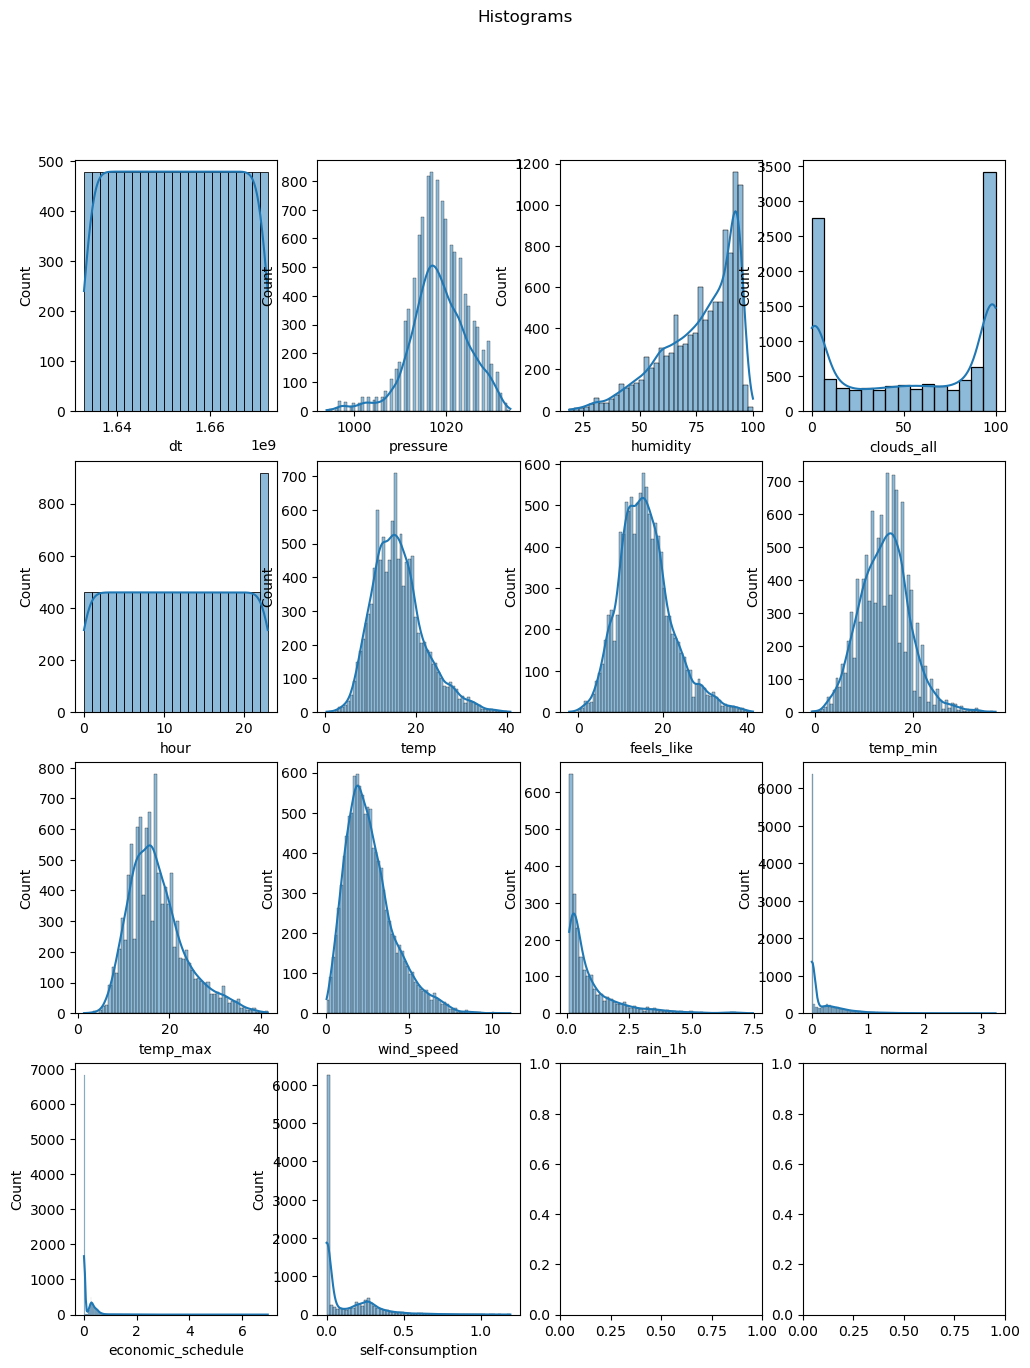

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(12, 15))
fig.suptitle("Histograms")

sns.histplot(df["dt"], ax=axs[0,0], kde=True)
sns.histplot(df["pressure"], ax=axs[0,1], kde=True)
sns.histplot(df["humidity"], ax=axs[0,2], kde=True)
sns.histplot(df["clouds_all"], ax=axs[0,3], kde=True)
sns.histplot(df["hour"], ax=axs[1,0], kde=True)
sns.histplot(df["temp"], ax=axs[1,1], kde=True)
sns.histplot(df["feels_like"], ax=axs[1,2], kde=True)
sns.histplot(df["temp_min"], ax=axs[1,3], kde=True)
sns.histplot(df["temp_max"], ax=axs[2,0], kde=True)
sns.histplot(df["wind_speed"], ax=axs[2,1], kde=True)
sns.histplot(df["rain_1h"], ax=axs[2,2], kde=True)
sns.histplot(df["normal"], ax=axs[2,3], kde=True)
sns.histplot(df["economic_schedule"], ax=axs[3,0], kde=True)
sns.histplot(df["self-consumption"], ax=axs[3,1], kde=True)

/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


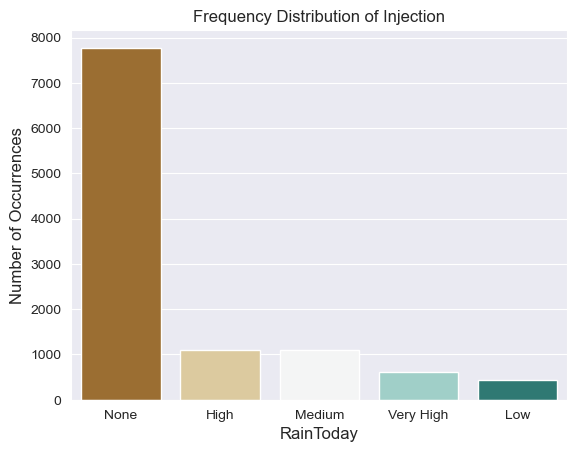

In [ ]:
injection_count = df['injection'].value_counts()
sns.set_style('darkgrid')
sns.barplot(x=injection_count.index, y=injection_count.values, palette='BrBG')
plt.title('Frequency Distribution of Injection')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('RainToday', fontsize=12)
plt.show()

In [ ]:
label_encoder = LabelEncoder()

df['injection'] = label_encoder.fit_transform(df['injection'])

df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d", utc=True)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.drop(['date'], inplace=True, axis=1)

/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

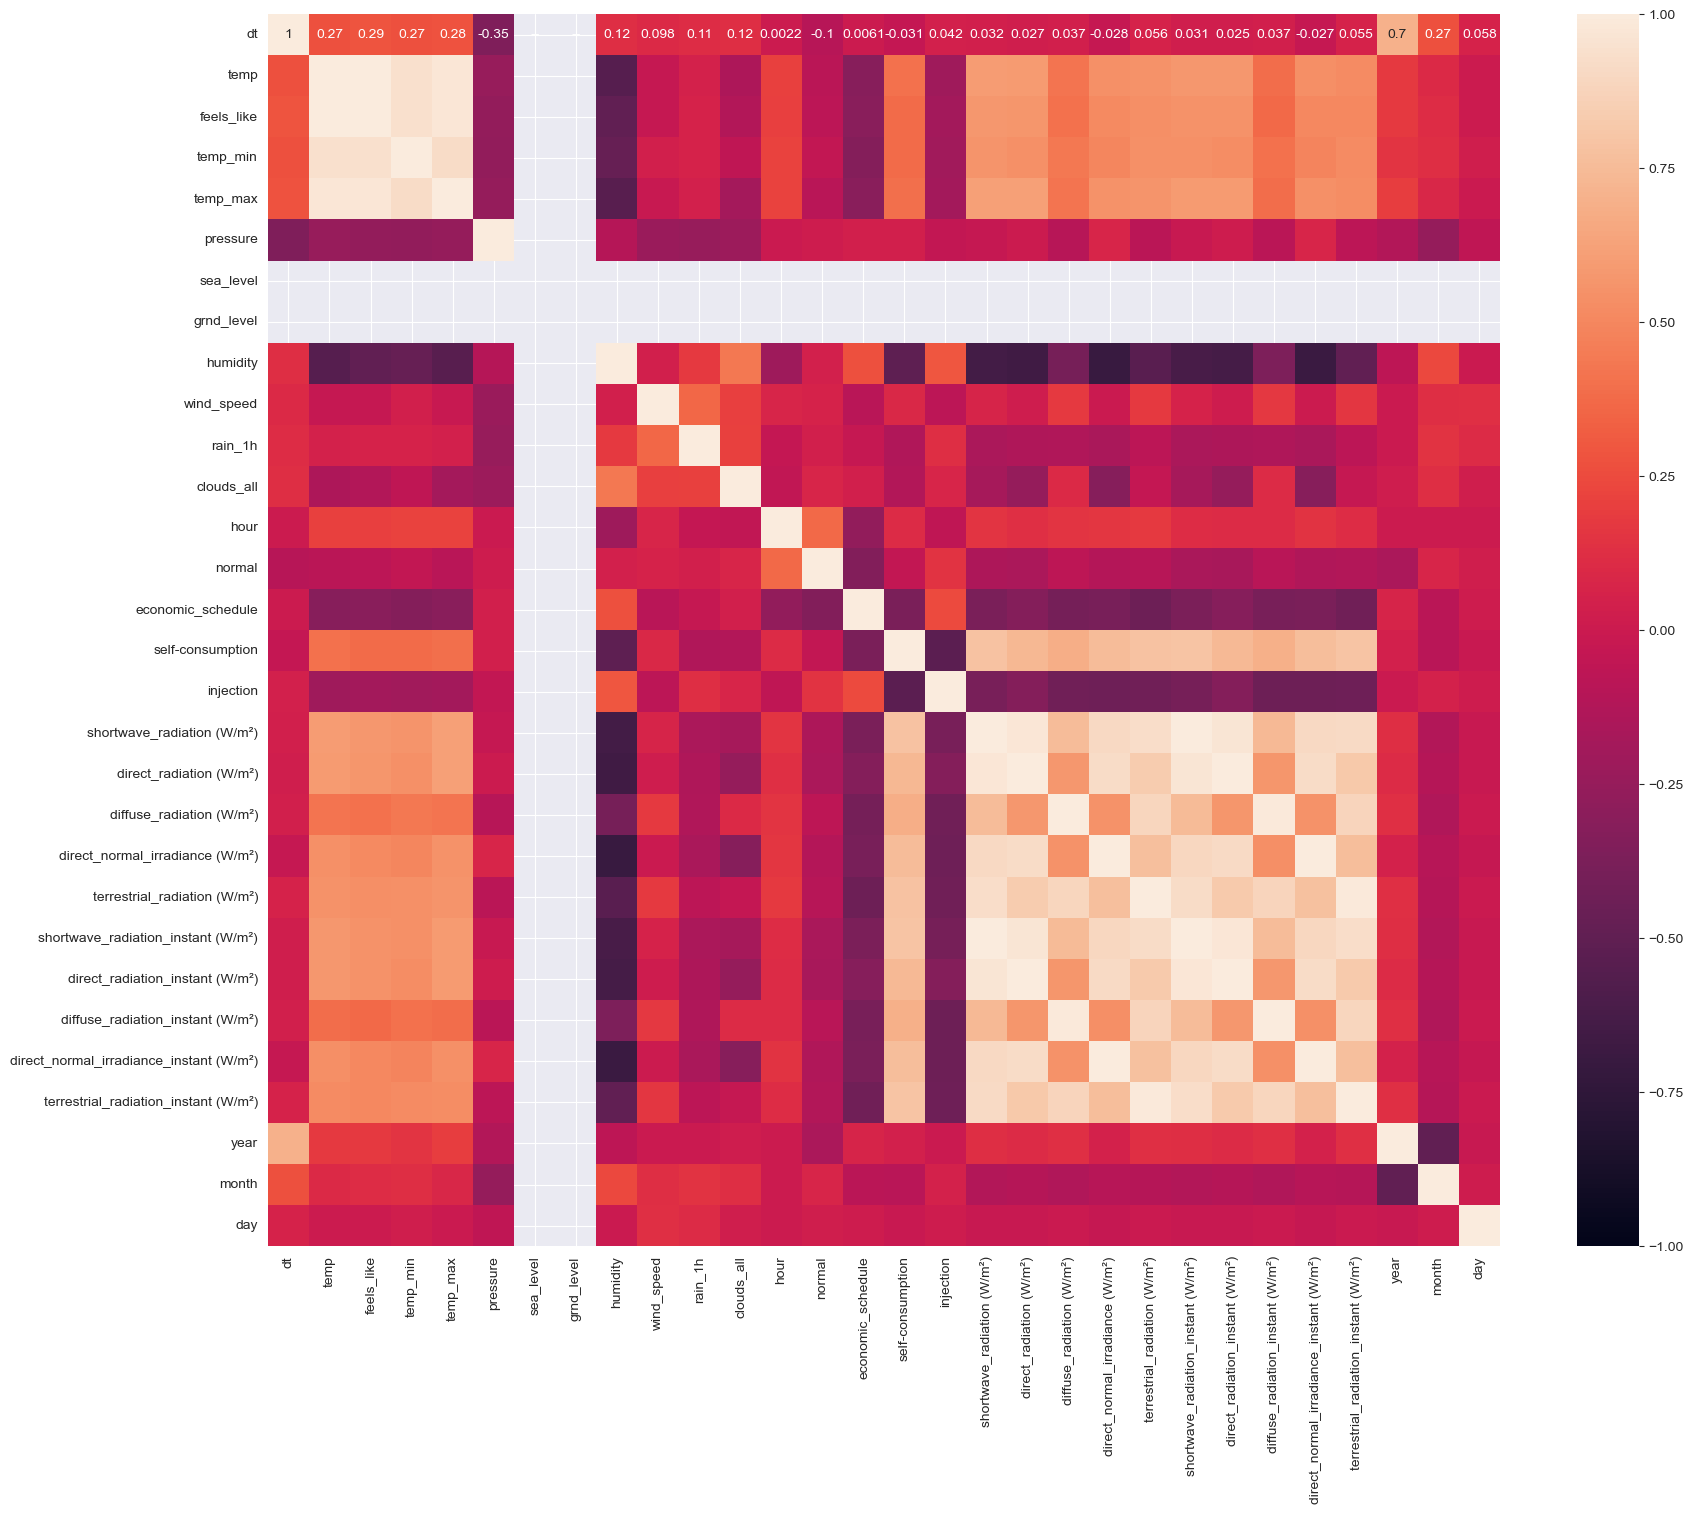

In [ ]:
corr_matrix = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

In [ ]:
print(corr_matrix["injection"])

dt                                         0.041863
temp                                      -0.209680
feels_like                                -0.195312
temp_min                                  -0.199771
temp_max                                  -0.193484
pressure                                  -0.040450
sea_level                                       NaN
grnd_level                                      NaN
humidity                                   0.292897
wind_speed                                -0.070369
rain_1h                                    0.124366
clouds_all                                 0.077215
hour                                      -0.057440
normal                                     0.147976
economic_schedule                          0.242812
self-consumption                          -0.527046
injection                                  1.000000
shortwave_radiation (W/m²)                -0.389845
direct_radiation (W/m²)                   -0.330217
diffuse_radi